In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [3]:
#df1 link -- https://www.kaggle.com/septa97/100k-courseras-course-reviews-dataset?select=reviews.csv
df1 = pd.read_csv('reviews_data.csv', usecols=['Review', 'Label'])
df1= df1.rename(columns={'Review':'content','Label':'score'})

#df2 link -- https://www.kaggle.com/bharadwaj6/kindle-reviews
#getting negative reviews from kindle dataset(df2) to deal with imbalance data 
df2 = pd.read_csv('https://www.kaggle.com/bharadwaj6/kindle-reviews', usecols=["summary", "overall"])
df2 = df2.rename(columns={"summary":'content', "overall":"score"})
df2 = df2[df2["score"]<3]

In [5]:
print('df1 Shape:  {}'.format(df1.shape))
print('df2 Shape:  {}'.format(df2.shape))

df1 Shape:  (107018, 2)
df2 Shape:  (57148, 2)


In [6]:
# Creating label column
df1['label'] = np.where(df1['score']<3, 0,
                      np.where(df1['score']>4, 1, 3))

df2['label'] = 0

# removing the neutral value...
df1 = df1[df1['label']!=3]
df1 = df1.reset_index(drop=True)

In [7]:
#Concating two dataset
df = [df1, df2]
data = pd.concat(df)
data = data.reset_index(drop=True)
data.shape

(141041, 3)

In [8]:
data

,content,score,label
0,good and interesting,5,1
1,"This class is very helpful to me. Currently, I...",5,1
2,like!Prof and TAs are helpful and the discussi...,5,1
3,Easy to follow and includes a lot basic and im...,5,1
4,"Great course - I recommend it for all, especia...",5,1
...,...,...,...
141036,What a disappointment!,1,0
141037,What happened to The Intern?!,2,0
141038,Wanted to love this book...,2,0
141039,I wanted to love it...,1,0


C:\Users\ELCOT\Anaconda3\envs\finalproject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ELCOT\Anaconda3\envs\finalproject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


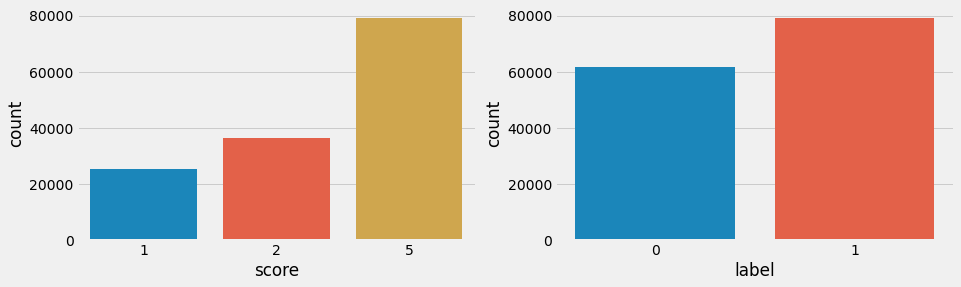

1    79173
0    61868
Name: label, dtype: int64


In [9]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.countplot(data['score'])

plt.subplot(1,2,2)
sns.countplot(data['label'])
plt.show()

print(data.label.value_counts())

In [10]:
# getting the length of the reviews
data['content_len'] = data.content.apply(len)

C:\Users\ELCOT\Anaconda3\envs\finalproject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


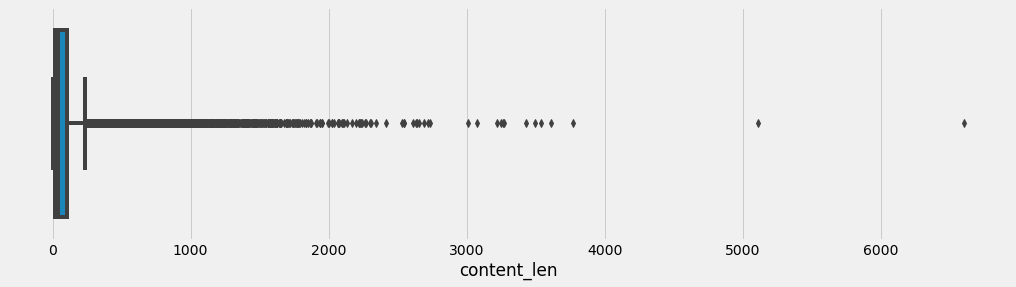

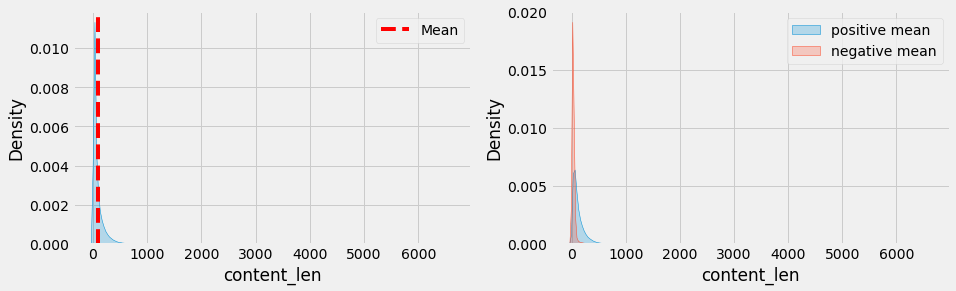

In [11]:
# boxplot nd distribution of length of the reviews
plt.figure(figsize=(16,4))
sns.boxplot(data['content_len'])
plt.show()

plt.figure(figsize=(14,4))
description = data.content_len.describe()
plt.subplot(1,2,1)
sns.kdeplot(data['content_len'], shade=True)
plt.axvline(description['mean'], ls="--", color='r')
plt.legend(['Mean'])

plt.subplot(1,2,2)
sns.kdeplot(data[data['label'] == 1]['content_len'], shade=True)
sns.kdeplot(data[data['label'] == 0]['content_len'], shade=True)
plt.legend(['positive mean','negative mean','positive','negative'])
plt.show()

In [12]:
# Removing Outliers from the content(removing the reivews which have more the 1000 char)
data = data[data['content_len']<1000]
data = data.reset_index(drop=True)

In [13]:
data.label.value_counts()

1    78922
0    61641
Name: label, dtype: int64

C:\Users\ELCOT\Anaconda3\envs\finalproject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


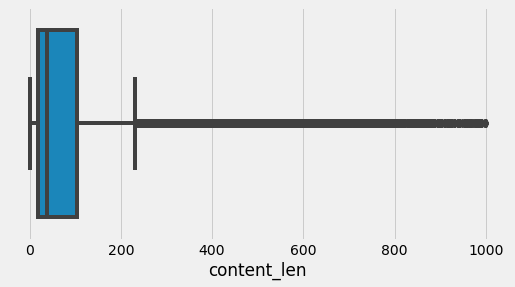

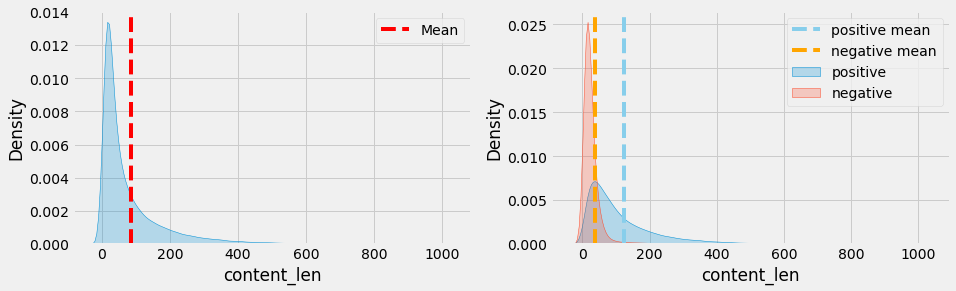

In [14]:
# distribution after removing some outliers(reviews char more the 1K)
plt.figure(figsize=(8,4))
sns.boxplot(data['content_len'])
plt.show()

plt.figure(figsize=(14,4))
description = data.content_len.describe()
plt.subplot(1,2,1)
sns.kdeplot(data['content_len'], shade=True)
plt.axvline(description['mean'], ls="--", color='r')
plt.legend(['Mean'])

plt.subplot(1,2,2)
sns.kdeplot(data[data['label'] == 1]['content_len'], shade=True)
plt.axvline(data[data['label']==1]['content_len'].describe()['mean'], ls="--", color='skyblue')
sns.kdeplot(data[data['label'] == 0]['content_len'], shade=True)
plt.axvline(data[data['label']==0]['content_len'].describe()['mean'], ls="--", color='orange')
plt.legend(['positive mean','negative mean','positive','negative'])
plt.show()

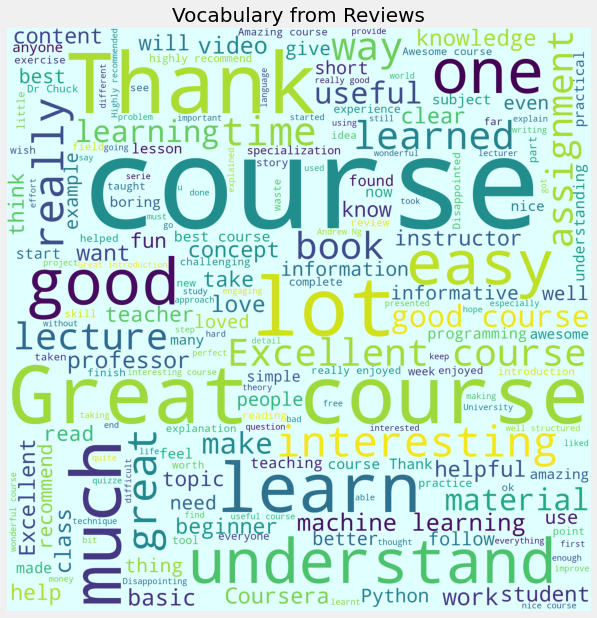

In [19]:
#most frequently present words in reviews
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate(' '.join(list(data['content'])))
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews", fontsize = 20)
plt.show()

In [32]:
# Stopwords Edited version...
import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

my_stopwords = ['i','let', 'us', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "youre", "youve", "youll", 
                "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "shes", 'her', 
                'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 
                'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 
                'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'if', 
                'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
                'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 
                'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 
                'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 
                'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', "should've", 'now', 'd', 'll', 
                'm', 'o', 're', 've', 'y','ur','me',"im",'etc','app','get','got','set',"ill",'class','course','coursera',
                'courses','classes','videos','professor',"i've",'certificate','exercise','teacher','teaching','assignment'
                'video','material','project','lecture','capstone','ive','see','instructor','student','book','student',
                'people','one','machine learning','python']

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ELCOT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
import string
punctuation = string.punctuation
# punctuation = punctuation.replace("'", "")

# Cleaning the data....
#better use strip func
def cleaning(text):
    # Removing punctuations
    text = [char for char in text if char not in string.punctuation]   
    punc_text = ''.join(text)
    # Changing to lowercase letters
    text = [char.lower() for char in punc_text.split()]       
    lower_text = ' '.join(text)
    #using lemmatization
    text = [lemmatizer.lemmatize(word) for word in lower_text.split()]
    lemmatized = ' '.join(text)
    # Removing stopwords
    text = [char for char in lemmatized.split() if char not in my_stopwords]   
    clean_content = ' '.join(text)
    
    #Returning the clean content
    return clean_content
    

In [33]:
# cleaning by removing punctuation, stopwords and lemmatization
clean_content = data.content.apply(cleaning)
# Removing emojies...
clean_content = clean_content.apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
data['clean_content'] = clean_content

In [34]:
# print(list(data.clean_content[80000:]))


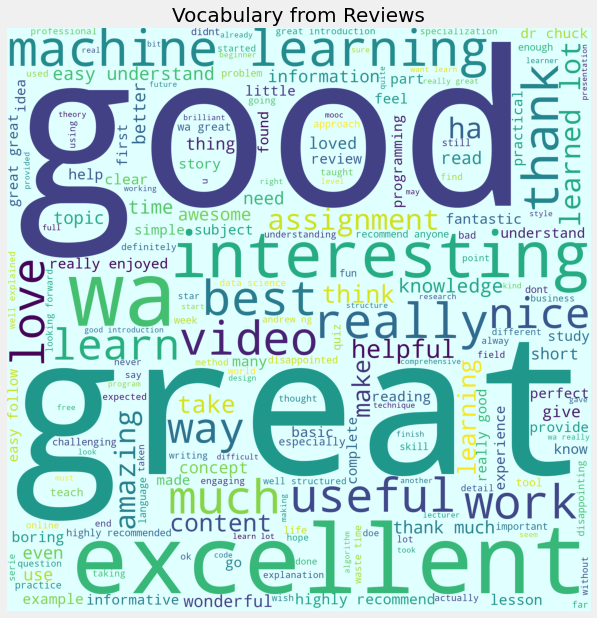

In [35]:
wordcloud = WordCloud(background_color='lightcyan',width = 2000,height = 2000).generate(' '.join(list(data['clean_content'])))
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews", fontsize = 20)
plt.show()

C:\Users\ELCOT\Anaconda3\envs\finalproject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


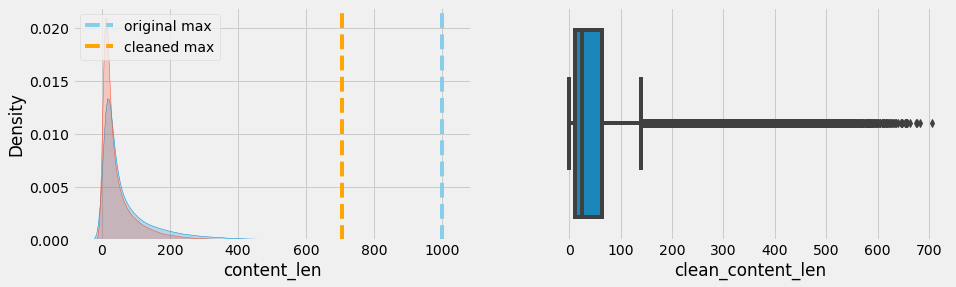

In [36]:
data['clean_content_len'] = data.clean_content.apply(len)
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.kdeplot(data['content_len'], shade=True)
plt.axvline(data['content_len'].describe()['max'], ls='--',color='skyblue')
sns.kdeplot(data['clean_content_len'], shade=True)
plt.axvline(data['clean_content_len'].describe()['max'], ls='--', color='orange')
plt.legend(['original max', 'cleaned max'])

plt.subplot(1,2,2)
sns.boxplot(data['clean_content_len'])
plt.show()

In [37]:
data.head()

,content,score,label,content_len,clean_content,clean_content_len
0,good and interesting,5,1,20,good interesting,16
1,"This class is very helpful to me. Currently, I...",5,1,121,helpful currently still learning make lot basi...,63
2,like!Prof and TAs are helpful and the discussi...,5,1,117,likeprof ta helpful discussion among quite act...,79
3,Easy to follow and includes a lot basic and im...,5,1,81,easy follow includes lot basic important techn...,63
4,"Great course - I recommend it for all, especia...",5,1,75,great recommend especially business manager,43


In [74]:
x = data['clean_content']
y = data['label']
print(x.shape)
print(y.shape)

(140563,)
(140563,)


In [79]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import pickle
vectorizer = TfidfVectorizer(max_features=37500)
X = vectorizer.fit_transform(x)
pickle.dump(vectorizer, open('sentiment_transformer.pkl', 'wb'))

In [80]:
X.shape

(140563, 37500)

In [82]:
# Imorting Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC

# Metrics
# from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
#already trained and tested by spilting the data and selected the algorithm with best accuracy
# support vector machine with -- 96.343 acc
#combined the data and trained using svm and then converted into pkl file

In [83]:
classifier = SVC()
classifier.fit(X,y)
pickle.dump(classifier, open('sentiment_model.pkl', 'wb'))